In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline 


1. Data Loading and Preprocessing

In [3]:
# Load the dataset
df = pd.read_csv('Dataset of Diabetes .csv')

# Drop irrelevant columns
df.drop(['ID', 'No_Pation'], axis=1, inplace=True)

# Convert target variable to boolean
df['CLASS'] = df['CLASS'] == 'Y'

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))


| Gender   | AGE   | Urea   | Cr   | HbA1c   | Chol   | TG   | HDL   | LDL   | VLDL   | BMI   | CLASS   |
|:---------|:------|:-------|:-----|:--------|:-------|:-----|:------|:------|:-------|:------|:--------|
| F        | 50    | 4.7    | 46   | 4.9     | 4.2    | 0.9  | 2.4   | 1.4   | 0.5    | 24    | False   |
| M        | 26    | 4.5    | 62   | 4.9     | 3.7    | 1.4  | 1.1   | 2.1   | 0.6    | 23    | False   |
| F        | 50    | 4.7    | 46   | 4.9     | 4.2    | 0.9  | 2.4   | 1.4   | 0.5    | 24    | False   |
| F        | 50    | 4.7    | 46   | 4.9     | 4.2    | 0.9  | 2.4   | 1.4   | 0.5    | 24    | False   |
| M        | 33    | 7.1    | 46   | 4.9     | 4.9    | 1    | 0.8   | 2     | 0.4    | 21    | False   |


2. Feature Scaling and Selection

In [6]:
# Features for clustering
features = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
X_scaled


array([[-0.40114429, -0.14478078, -0.38267195, ..., -1.08545731,
        -0.369958  , -1.12462205],
       [-3.13001704, -0.21295413, -0.11580401, ..., -0.4573978 ,
        -0.34264878, -1.32623876],
       [-0.40114429, -0.14478078, -0.38267195, ..., -1.08545731,
        -0.369958  , -1.12462205],
       ...,
       [-2.67520491,  0.67329948,  0.20110167, ..., -0.18822944,
         1.70554268, -0.43912523],
       [-1.76558067,  0.23017268, -0.16584175, ...,  0.2603845 ,
         3.31678663,  2.2020537 ],
       [ 0.05366783, -0.04252074, -0.03240778, ...,  0.35010729,
        -0.31533956,  0.68992836]])

3. K-Means Clustering

c:\Users\erfan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\erfan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\erfan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\erfan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

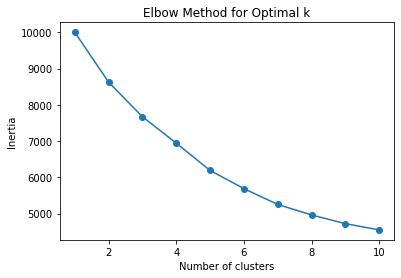

In [4]:
# Determine optimal number of clusters (Elbow Method)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Choosing the Number of Clusters (k):

>The "elbow" in the plot suggests a potential optimal number of clusters.

>Domain knowledge might also guide the choice based on expected subgroups.

In [5]:
# Apply K-Means with selected k (e.g., k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


c:\Users\erfan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4. Cluster Analysis

In [6]:
# Cluster sizes and diabetes prevalence
print("Cluster Sizes and Diabetes Prevalence:")
print(df.groupby('cluster')['CLASS'].agg(['count', 'mean']).to_markdown(numalign="left", stralign="left"))
print("\n")
# Average feature values by cluster
print("Average Feature Values by Cluster:")
print(df.groupby('cluster')[features].mean().to_markdown(numalign="left", stralign="left"))


Cluster Sizes and Diabetes Prevalence:
| cluster   | count   | mean     |
|:----------|:--------|:---------|
| 0         | 241     | 0.360996 |
| 1         | 759     | 0.992095 |


Average Feature Values by Cluster:
| cluster   | AGE     | Urea    | Cr      | HbA1c   | Chol    | TG      | HDL     | LDL     | VLDL    | BMI     |
|:----------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|:--------|
| 0         | 42.6183 | 4.61577 | 63.7012 | 5.53485 | 4.73444 | 1.92448 | 1.21929 | 2.71515 | 1.35353 | 23.6043 |
| 1         | 56.9921 | 5.28635 | 70.6074 | 9.15318 | 4.90358 | 2.4846  | 1.20013 | 2.57634 | 2.01383 | 31.4748 |


5. PCA Visualization

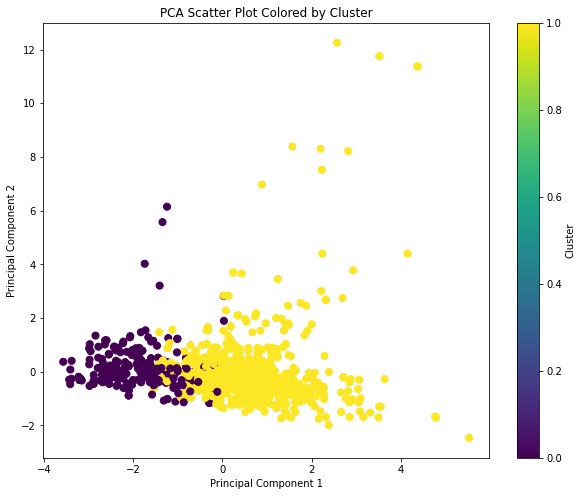

In [7]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create a scatter plot of PCA results colored by cluster
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['cluster'], cmap='viridis', s=50)
plt.title('PCA Scatter Plot Colored by Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
